> ****:

# Project: Investigate the Dataset (No Show Appointment Data)


## Abdus-Salaam AbdulHafiz


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Information and Description of columns

> **Snippet**: This dataset used contains data of 110,527 patients indicating whether they showed up or not for their scheduled medical appointments. 
<br/>
> The datset contains 14 features(columns) of which some of the feautures would be used to assess as to why a patient would meet his/her appointment or not.

 <a id='intro'></a>



> ****: 01 - PatientId
<br/>
A unique ID which identifies the patient
<br/>
02 - AppointmentID
<br/>
A unique ID for each appointment
<br/>
03 - Gender
<br/>
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
Fis Female; M is Male
<br/>
04 - ScheduledDay <br/>
The day someone called or registered the appointment, this is before appointment of course.
<br/>
05 -  AppointmentDay <br/>
The day of the actual appointment, when they have to visit the doctor.
<br/>
06 - Age<br/>
How old is the patient.
<br/>
07 - Neighbourhood<br/>
Where the appointment takes place.
<br/>
08 - Scholarship <br/>
Scholarship decribes if the patient is recieving financial aid from the government to attend school and get vaccinated, 
True(1) or False(0) . Read https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia for more information?
<br/>
09 - Hipertension
<br/>
Reports if the Patient is diagnosed to have hypertension. 1 is True 0 is False
<br/>
10 - Diabetes
<br/>
Reports that the patient is diagnosed with Diabetes. 1 is True 0 is False
<br/>
11 - Alcoholism
<br/>
Reports from history taking, that the patient known to be an alchoholic or not. 1 is True 0 is False
<br/>
12 - Handcap
<br/>
Reports if the Patient is handicapped. True or False
<br/>
SMS_received
<br/>
13 - Reports if messages were sent to remind the patient of the appointment.1 means SMS wassent, 0 neans SMS was not sent.
<br/>
No-show
<br/>
This reports if the patient eventually showed up for the appointment. 'No' implies patient didn't show up and 'Yes' implies patient showed uopTrue or False.

## <a id='wrangling'></a>
## Data Wrangling

> **Here**: The No-show appointment dataset is imported and explored for the cleanliness of data.
Missing values, Duplicated rows and wrong datatypes are checked for, explored and taken care of where necessary

### General Properties

#### Importing packages to be used

In [1]:

import numpy as np
import pandas as pd #for data wrangling
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization



##### Loading the dataset

In [2]:
#Loading the dataset
appointment_df = pd.read_csv("KaggleV2-May-2016.csv")

##### Getting a summary information about our dataset

In [3]:
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### From the initial summary it can be noted that:
    - Our dataset contains 110,527 appointment observations.
    - The dataset also contains 14 feautures that describe the patients attributes and how the feautures may explain why they miss/met their respective appointment.
    - It is also noted that our dataset contains no missing values, hence there wouldn't be need for handling missing values.
    

In [4]:
#Taking a peek into some of the samples in the dataset
appointment_df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
109723,6.548261e+11,5763804,M,2016-06-02T09:25:20Z,2016-06-06T00:00:00Z,8,SÃO PEDRO,1,0,0,0,0,1,No
19319,3.754321e+13,5722401,M,2016-05-20T07:16:37Z,2016-05-20T00:00:00Z,8,BELA VISTA,1,0,0,0,0,0,No
91725,3.524166e+14,5772034,F,2016-06-03T14:26:11Z,2016-06-03T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
109963,7.969723e+12,5768039,F,2016-06-03T07:17:15Z,2016-06-07T00:00:00Z,67,INHANGUETÁ,0,1,1,0,0,1,No
32701,3.862734e+12,5740485,M,2016-05-25T15:26:03Z,2016-05-31T00:00:00Z,25,BENTO FERREIRA,0,0,0,0,0,0,Yes


##### Further exploration of the dataset...

In [5]:
 #Exploring the dataset for duplicated values also informs us that they are no duplicated rows in the dataset
appointment_df.duplicated().sum()

0

In [6]:
#checking for unique values
appointment_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#checking for duplicate Patient ID
appointment_df.PatientId.duplicated().sum()


48228

In [8]:
#investigating for possibility of a patient having a duplicated appointment for the same day
appointment_df[['PatientId','AppointmentDay']].duplicated().sum()


# 8,719 patients appears to have the same patientid and the the same appointment day

8719

In [9]:
#Handicap shows 5 unique values which goes against the normal description of just True/False. Lets explore whats goin on
appointment_df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

### Further in our initial analysis, it is observed that:
>    1. There are no duplicated rows in the dataset. 
>    2. They are also no duplicated AppointmentID's but duplicated PatientId's (48,228 observations) can be found and this implies that some patients booked appointments on more than one occassion.
>    3. Also, with further probing, it was noticed that they are duplicated 'PAtientIDS' and 'AppointmentDay' (8,719 observations) indicating that there are duplicate entries for patients coming on the same day.
>    4. Handicap column shows 5 unique values which goes against the normal description of just True/False.We would explore and clean in the Data cleaning section

    

## Data Cleaning!!

#### In this data cleaning process, we would be:
    1. Taking care of typographical errors from the column names.
    2. Renaming the no-show column to in order to make it easier to understand.
    3. Drop columns that wont be useful for our analysis.
    4. Change the datatypes for (appointment day,scheduleday) to Datetime format.
    5. Explore the handicap column to see whats wrong and drop the vlaues in the Handicap column that shouldnt be there
    6. Drop columns with duplicated appointments for the same day

In [10]:
# renaming the cells with typographical errors
appointment_df.rename(columns = {'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap'}, inplace = True)

print(appointment_df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')


In [11]:
appointment_df.sample(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
78076,7.261869e+13,5700601,M,2016-05-16T09:36:17Z,2016-05-16T00:00:00Z,51,SANTA MARTHA,0,1,0,0,0,0,No
98293,5.255696e+13,5684951,F,2016-05-11T09:27:26Z,2016-06-01T00:00:00Z,5,MARIA ORTIZ,1,0,0,0,0,1,No


In [12]:
# renaming the no-show column to 'showed_up' so as to be easier to undertand,
#And also, changing the respective values( i.e change "yes" to "No", and "No" to "Yes" so as to align with the earlier renamed column)
appointment_df.rename(columns = {'No-show':'Showed_up'} , inplace = True)
appointment_df['Showed_up'] = appointment_df['Showed_up'].str.replace("No","True").str.replace("Yes","False")
appointment_df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True


In [13]:
#conveting ScheduledDay and AppointmentDay to datetime format
appointment_df['ScheduledDay'] = pd.to_datetime(appointment_df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
appointment_df['AppointmentDay'] = pd.to_datetime(appointment_df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
appointment_df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,True


In [14]:
#Handicap shows 5 unique values which goes against the normal description of just True/False. Lets explore whats goin on
appointment_df.Handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [15]:
 #dropping the wrong enteries as 2,3, and 4 should not be present (And individual )
ind = appointment_df.query('Handicap in [2,3,4]').index
appointment_df.drop(index = ind,inplace=True)

In [16]:
#checking if the Handicap column has been corrected
appointment_df.Handicap.value_counts()

0    108286
1      2042
Name: Handicap, dtype: int64

In [17]:
# drop duplicates that that were talked about earlier.
appointment_df.drop_duplicates(['PatientId','AppointmentDay'],inplace=True)


In [18]:
# (patient id, -appointment id ) are not needed for our analysis and so they will be dropped.
appointment_df.drop(['PatientId','AppointmentID'], axis=1,inplace=True)
#check
appointment_df.sample(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up
51776,M,2016-05-06 12:23:16,2016-05-06,19,JOANA D´ARC,0,0,0,0,0,0,True


<a id='eda'></a>
## Exploratory Data Analysis

>  Here, we would be doing doing further exploration into the data, answering the research questions and understanding it better with visualizations. 



In [19]:
#summary statistics to describe my data
appointment_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,101629.0,37.043206,23.203367,-1.0,18.0,37.0,56.0,115.0
Scholarship,101629.0,0.097649,0.296841,0.0,0.0,0.0,0.0,1.0
Hypertension,101629.0,0.197936,0.398445,0.0,0.0,0.0,0.0,1.0
Diabetes,101629.0,0.072332,0.259038,0.0,0.0,0.0,0.0,1.0
Alcoholism,101629.0,0.027630,0.163911,0.0,0.0,0.0,0.0,1.0
Handicap,101629.0,0.018066,0.133190,0.0,0.0,0.0,0.0,1.0
SMS_received,101629.0,0.335613,0.472207,0.0,0.0,0.0,1.0,1.0


##### It is noticed that Age has a value of -1, we would need to correct that.

In [20]:
#searching for -1 age
appointment_df.loc[appointment_df['Age']==-1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,True


In [21]:
#dropping it 
appointment_df.drop(index=99832,inplace=True)

In [22]:
#confirming the deletion
appointment_df.loc[appointment_df['Age']==-1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up


##### Looking at the percentage of patients thats showed up to those that didnt show up

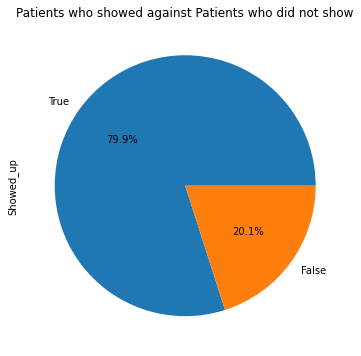

In [23]:
appointment_df.Showed_up.value_counts().plot(kind="pie",figsize=(12,6),autopct='%1.1f%%');
plt.title('Patients who showed against Patients who did not show');
# It is noticed that 79.9% of patients shpwed up and 20.1% did not show up

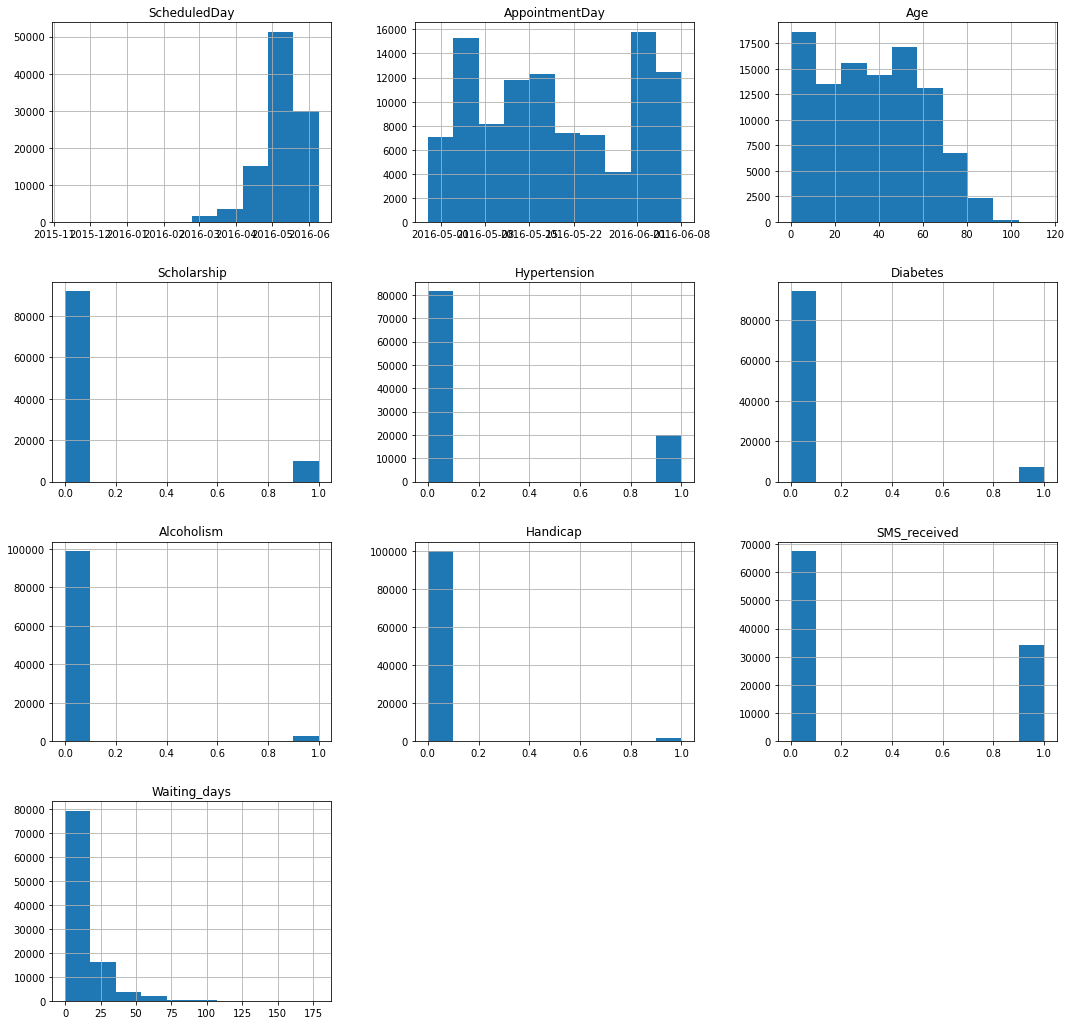

In [45]:
#Visualizing histogram to undertand the whole data
appointment_df.hist(figsize=(18,18));
plt.title("General overview of the data making use of an histogram plot ");


####
- It can be observed that less patients who are hypertensive, diabetic, handicapped and Alchoholic
- It can also be observed that less patients received scholarship
- The age is evenly distributed from around 0yrs to 100yrs with majority of the patients been younger
- Less patients received sms alerts

### Research Question 1 (Does the waiting period relate with whether a patient would show up or not ?)

In [25]:
# We would first need to extract the waiting period by subtracting the ScheduledDay from the AppointmentDay
appointment_df['Waiting_days'] = (appointment_df['AppointmentDay'].dt.date -appointment_df['ScheduledDay'].dt.date ).dt.days
appointment_df.sample()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Waiting_days
95093,M,2016-06-02 07:33:48,2016-06-02,22,GURIGICA,0,0,0,0,0,0,True,0


In [26]:
#some patients have waiting days of negative value, and this has to be addressed.
appointment_df1 = appointment_df[appointment_df.Waiting_days < 0]
appointment_df1

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Waiting_days
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,False,-1
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,False,-1
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,False,-1
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,False,-1


In [27]:
#Dropping the neagtive waitingcolumns as there wont be any of any value using them in the analysis and might even corrupt any findings
ind = appointment_df.query('Waiting_days in [-1,-1,-1,-1]').index
appointment_df.drop(index = ind,inplace=True)
#checking
appointment_df[appointment_df.Waiting_days < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Waiting_days


In [28]:
# Getting only patients who showed up
Attended_patients = appointment_df.loc[appointment_df['Showed_up']=='True']


# Getting patients who showed up within the waiting days
waiting_attended = Attended_patients.groupby('Waiting_days').Showed_up.count()



#organizing the output,resetting index and renaming the column 
waiting_attended = waiting_attended.rename_axis('Waiting_days').reset_index(name='Patients_who_turnedup')
waiting_attended

,Waiting_days,Patients_who_turnedup
0,0,32791
1,1,3903
2,2,4965
3,3,1968
4,4,3894
...,...,...
118,155,4
119,162,9
120,169,7
121,176,10


###### It can be observed that the more waiting days there are, the less Patients turned up for the the appointment.


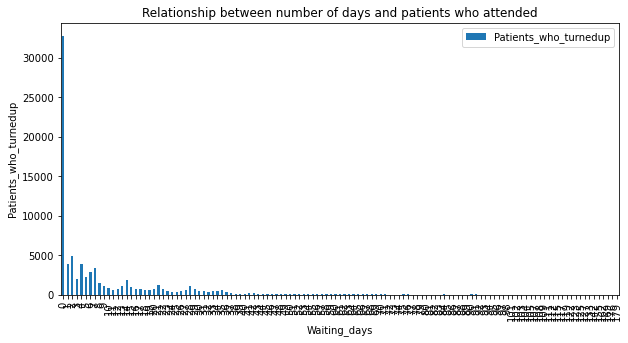

In [29]:
# Visualizing the results as a bar chart plot to view it better
waiting_attended.plot.bar(x='Waiting_days',y='Patients_who_turnedup',figsize=(10,5))
plt.ylabel('Patients_who_turnedup')
plt.xlabel('Waiting_days')

plt.title("Relationship between number of days and patients who attended");

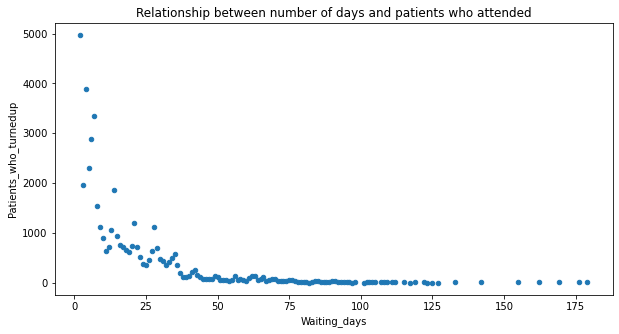

In [30]:
# Visualizing the results as a scatterplot also
waiting_attended.query("Waiting_days > 1").plot.scatter(x='Waiting_days',y='Patients_who_turnedup',figsize=(10,5))
plt.title("Relationship between number of days and patients who attended");

##### The trend can be seen from the both plots above that the more days a patient ghas to wait, the less likely he/she will turn up for the appointment

## Exploring the effect of more waiting days on patients whom didn't show up also

In [31]:
#patients who didnt attend
Not_Attended_patients = appointment_df.loc[appointment_df['Showed_up']=='False']

nwaiting_attended = Not_Attended_patients.groupby('Waiting_days').Showed_up.count()


#organizing the output,resetting index and renaming the column 
nwaiting_attended = nwaiting_attended.rename_axis('Waiting_days').reset_index(name='Patients_who_didnt_turnedup')
nwaiting_attended

,Waiting_days,Patients_who_didnt_turnedup
0,0,1416
1,1,1047
2,2,1543
3,3,603
4,4,1165
...,...,...
106,155,6
107,162,2
108,169,1
109,176,6


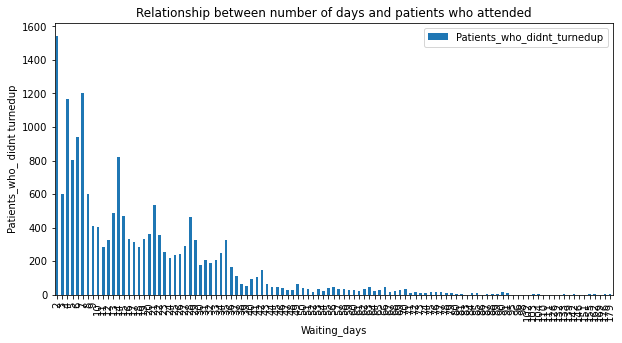

In [32]:
#bar chart
nwaiting_attended.query("Waiting_days > 1").plot.bar(x='Waiting_days',figsize=(10,5))
plt.ylabel('Patients_who_ didnt turnedup')
plt.xlabel('Waiting_days')

plt.title("Relationship between number of days and patients who attended");

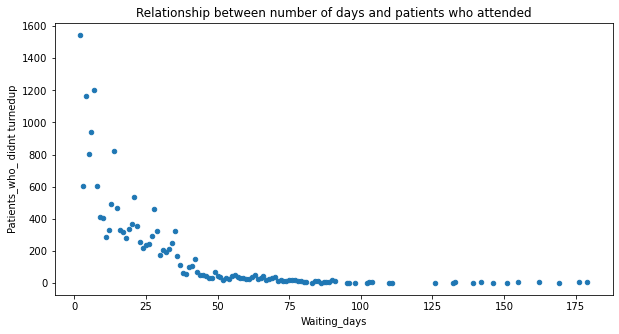

In [33]:
nwaiting_attended.query("Waiting_days > 1").plot.scatter(x='Waiting_days',y='Patients_who_didnt_turnedup',figsize=(10,5))
plt.ylabel('Patients_who_ didnt turnedup')
plt.title("Relationship between number of days and patients who attended");

###### It can be observed from both the histogram and scatter plot that as more days passed, patients who had longer waiting days and didnt show up increased.
- The later waiting days(169,176,179 waiting days) seems challanging to think of though as more patients showed up as compared to those that have the same waiting days  

### Research Question 2  (What Gender met up with appointment more? )

Text(0.5, 1.0, 'Gender Distribution')

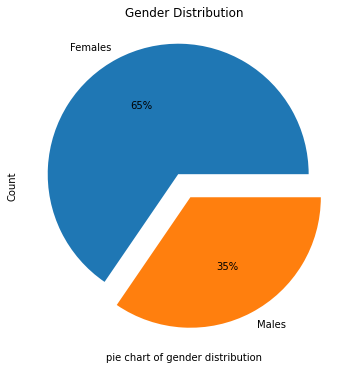

In [44]:
#Getting the gender distribution
plt.figure(figsize=(10,6))
appointment_df.Gender.value_counts().plot(kind="pie",labels=["Females","Males"],   autopct='%1.0f%%',explode=[0.1,0.1])
plt.ylabel("Count")
plt.xlabel("pie chart of gender distribution")
plt.title("Gender Distribution")

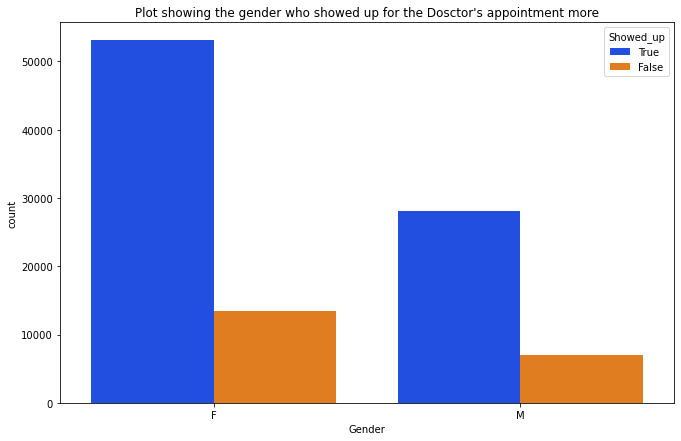

In [43]:
#Evaluating the gender that met up with the appointment more
plt.figure(figsize=(11,7))
sns.countplot(data=appointment_df,x="Gender",hue="Showed_up",palette="bright")
plt.title("Plot showing the gender who showed up for the Dosctor's appointment more");

#### It can be seen that :
- Females tend to attend to clinics more than male generally

- females are also more likely not to miss the doctors appointmnet

### Research Question 3 (Which age bracket are more likely to not neet the Doctor's Appointment ? )

Text(0.5, 1.0, 'Effect age people on Attend patient')

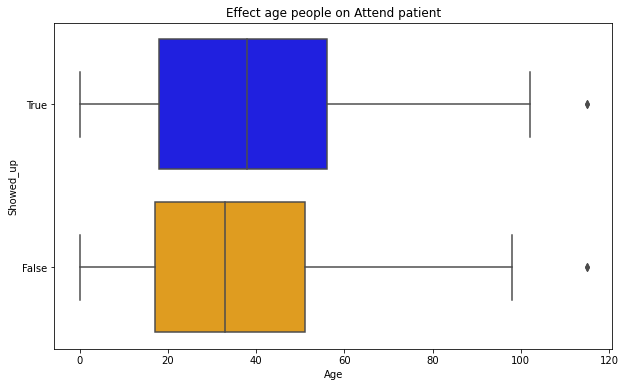

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=appointment_df,x="Age",y="Showed_up",palette=["blue","orange"])
plt.title("Effect age people on Attend patient")

##### it can be observed that the younger patients (16-55) didnt show up as opposed to older patients (20-60) 

### Research Question 4  (Patients who have chronic diseases vs Patients who dont have chronic disease : How did they show up? )

In [37]:
#Chronic diseases are diseases like Diabetics and and Hypertension

# calculating the percent of Pateints with all the chronic diseases who showed up:
chronic_dx_percent = (appointment_df.query('Hypertension == 1 & Diabetes == 1 & Showed_up == "True"').Showed_up.count() / appointment_df.query('Hypertension == 1 & Diabetes == 1').Showed_up.count())*100



#calculating the percent of Patients with no chronic diseases who showed up
non_chronicdx_percent = (appointment_df.query('Hypertension == 0 & Diabetes == 0 & Showed_up == "True"').Showed_up.count() / appointment_df.query('Hypertension == 0 & Diabetes == 0').Showed_up.count())*100



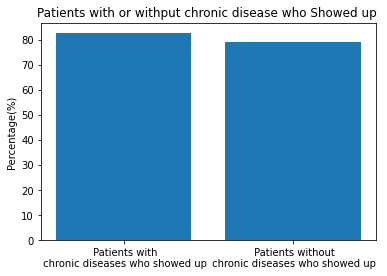

In [38]:
#visulaisation
plt.bar([" Patients with\n chronic diseases who showed up", " Patients without\n chronic diseases who showed up"], [chronic_dx_percent,non_chronicdx_percent]);
#plt.bar([chronic_dx_percent,non_chronicdx_percent],figsize=(10,5))
plt.title("Patients with or withput chronic disease who Showed up ");
plt.ylabel("Percentage(%)");

##### It can be observed that people who have chronic diseases (slightly) showed up more.
- Next we investigate for the chronic diseases indiviually

In [53]:
#Function to plot how the the individual chronic diseases affect how patients turn up
def diseaseplot(Disease):
    plt.figure(figsize=(10,6))
    sns.countplot(data=appointment_df,x=Disease,hue="Showed_up",palette='bright')
    plt.title(f"Relatitivity of patients who have {Disease} to how they showed up ");
    
    

    


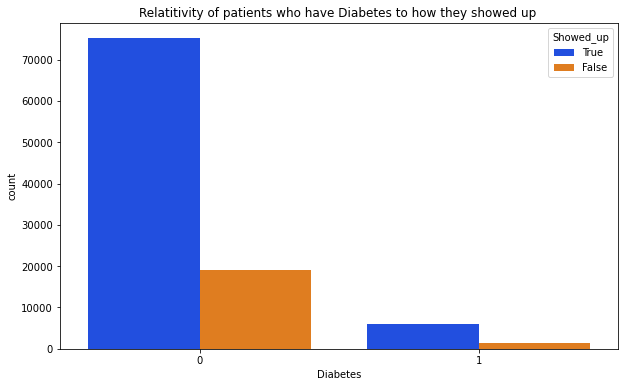

In [57]:
#investigating for Diabetes
diseaseplot('Diabetes')


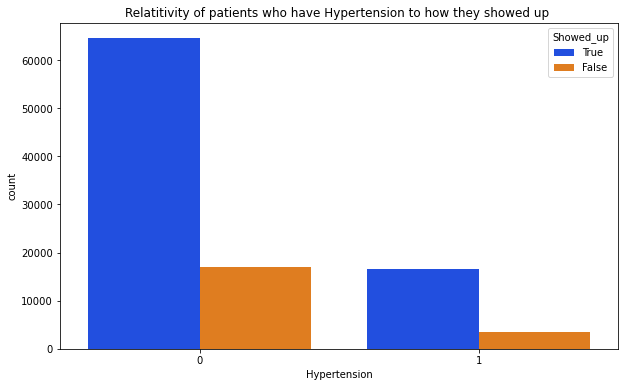

In [58]:
#Investigating for Hypertension
diseaseplot('Hypertension')

##### - 
- It can be observed that pf the proportion of people with Hypertension,more tend to show up for clinics
- Also, of the people with Diabetics, more also tend to show up

<a id='conclusions'></a>
## Conclusions

> **i**: From the data set, it is observed that:
- Most patients were females
- The histogram also showed us that most patients were young
- Most patients dont have a scholarship
- Less patients were diabetic, handicapped and Hypertensive.
- Less patients recieved SMS messages
- 


- The more a patient has to wait for an appointment, the less he is likely he is to attend.
- Females are more likely to meetup with appointments than males
- Younger patients are also more likely to not miss appointments
- Of the diabetic and Hypertensive patients, more of them are observed to have attended


 <a id='conclusions'></a>
## Limitations


- More females attending the hospital needs to be looked into as more data would be needed to evaluate the reasons why females come to clinic. It can stem from them having more disease debilities(females have more issues due to gyneacological problems) 
- Marital status, Employment status would also be good features to include as this would explain more reasons for not showing up for appointment.
- Having more countries or regions to include to the dataset  would be better.
- The no_show column caused confusion because the values inside it are reversed with the negation in the column name.
- Some data were [probably erronesoly imputed as it is not possible for day a patient has to wait to be negative, this also has to be looked into from the data collection angle
- The reason why some individuals with chronic disease tend not to show up goes against logical reasoning(as they should be the ones expected to be more in the clinic in order to take care of their health). This also needs to be explained either by collecting more data or checking the demographics of the people and understanding the possible factors that may account for this.
